## **Discription**

Breast cancer is the most common cancer amongst women in the world. In 2025, breast cancer is projected to be the most common cancer in women, with an estimated 316,950 new cases diagnosed, and 42,170 deaths. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning algorithms and the Breast Cancer Wisconsin (Diagnostic) Dataset.

## **Step 1 : Importing necessary libraries**

In [1]:
# pandas is a powerful library for data manipulation and analysis.
import pandas as pd 

# numpy is a library for numerical computing, providing support for arrays and mathematical operations.
import numpy as np

# matplotlib.pyplot is a library for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt 

# seaborn is a statistical data visualization library built on top of matplotlib, making plots more attractive and informative.
import seaborn as sns 

# Importing the warnings module to manage warning messages in Python.
import warnings 

# Suppressing all warnings to prevent them from being displayed.
warnings.filterwarnings("ignore") 

In [2]:
# StandardScaler: Standardizes features by removing the mean and scaling to unit variance (Z-score normalization).
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# LabelEncoder: Converts categorical labels into numeric values.
# It assigns a unique integer to each unique category in a column, making it useful for machine learning models.
from sklearn.preprocessing import LabelEncoder

# It is commonly used to evaluate machine learning models by dividing data into training and validation/testing portions.
from sklearn.model_selection import train_test_split 

In [3]:
# GridSearchCV: A hyperparameter tuning technique that finds the best combination of parameters for a model.
from sklearn.model_selection import GridSearchCV 

#### Importing ML algorithms

In [4]:
# LogisticRegression: A machine learning algorithm used for binary and multiclass classification problems.
# It predicts probabilities using the logistic (sigmoid) function and is widely used in statistical modeling.
from sklearn.linear_model import LogisticRegression

# DecisionTreeClassifier: A machine learning algorithm used for classification tasks.
# It creates a tree-like model by splitting data based on feature values to make decisions.
# Decision trees are easy to interpret and can handle both numerical and categorical data.
from sklearn.tree import DecisionTreeClassifier

# RandomForestClassifier: An ensemble learning method that combines multiple decision trees.
# It improves accuracy and reduces overfitting by averaging predictions from different trees (bagging technique).
# AdaBoostClassifier: An ensemble learning method that builds a strong classifier by combining multiple weak classifiers.
# It assigns higher weights to misclassified instances and focuses more on difficult cases in subsequent iterations (boosting technique).
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# SVC (Support Vector Classification): A machine learning algorithm used for classification tasks.
# It finds the optimal hyperplane that best separates different classes in the feature space.
# SVMs work well for both linear and non-linear classification by using different kernel functions.
from sklearn.svm import SVC 

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report ,f1_score,confusion_matrix, roc_auc_score,roc_curve

In [6]:
# Importing SimpleImputer for handling missing values
from sklearn.impute import SimpleImputer  

In [7]:
#  !pip install pydotplus
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

## **Step 2 : Loading the Breast Cancer Dataset**

In [157]:
# Reading a CSV (Comma-Separated Values) file into a Pandas DataFrame.
data = pd.read_csv("Breast Cancer METABRIC.csv")  

## **Step 3 : Data Preprocessing**

In [158]:
data.head() # Displaying the first five rows of the DataFrame.

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [159]:
data.shape # Getting the dimensions of the DataFrame.

(2509, 34)

In [160]:
data.columns # Retrieving the column names of the DataFrame.

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

In [161]:
data.info() # Displaying a summary of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [162]:
data['Overall Survival Status'].value_counts()

Overall Survival Status
Deceased    1144
Living       837
Name: count, dtype: int64

In [163]:
## Dropping the column which less important from the DataFrame
data = data.drop(columns=['Cancer Type','Pam50 + Claudin-low subtype', 'Cohort','Primary Tumor Laterality','ER status measured by IHC',
                          'HER2 status measured by SNP6','Oncotree Code','Sex', '3-Gene classifier subtype','Patient\'s Vital Status'])          

In [164]:
data.shape

(2509, 24)

In [165]:
data.describe()  ## Get the summary statistics for numerical variables

,Age at Diagnosis,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage
count,2498.000000,2388.000000,2243.000000,2357.000000,2287.000000,1981.000000,2388.000000,2360.000000,1788.000000
mean,60.420300,2.412060,1.950513,5.578702,4.028787,125.244271,108.842487,26.220093,1.713647
std,13.032997,0.649363,4.017774,3.967967,1.189092,76.111772,76.519494,15.370883,0.655307
min,21.930000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,50.920000,2.000000,0.000000,3.000000,3.048000,60.866667,40.560000,17.000000,1.000000
50%,61.110000,3.000000,0.000000,5.000000,4.044000,116.466667,99.095000,22.410000,2.000000
75%,70.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.640000,30.000000,2.000000
max,96.290000,3.000000,45.000000,80.000000,7.200000,355.200000,384.210000,182.000000,4.000000


In [166]:
data.describe(include='object') ## Get the summary statistics for categorical variables

,Patient ID,Type of Breast Surgery,Cancer Type Detailed,Cellularity,Chemotherapy,ER Status,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status
count,2509,1955,2509,1917,1980,2469,1980,2374,1980,1980,1980,1981,1980,1980,2488
unique,2509,2,8,3,2,2,2,8,2,2,11,2,2,2,2
top,MB-0000,Mastectomy,Breast Invasive Ductal Carcinoma,High,No,Positive,Negative,Ductal/NST,Yes,Post,8,Deceased,Positive,Yes,Not Recurred
freq,1,1170,1865,965,1568,1825,1733,1810,1216,1556,299,1144,1040,1173,1486


### Outliers Checking

<Axes: xlabel='Overall Survival Status', ylabel='Age at Diagnosis'>

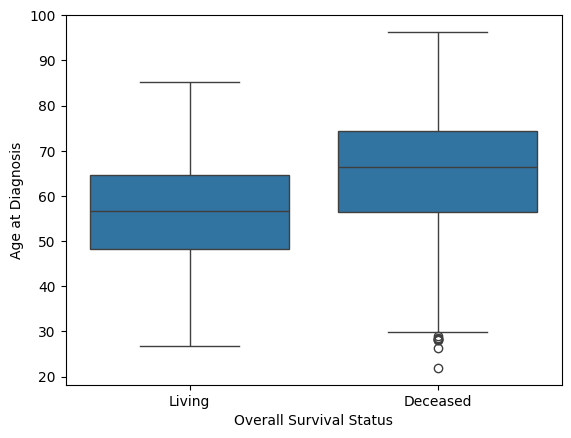

In [167]:
sns.boxplot(x='Overall Survival Status', y='Age at Diagnosis', data=data)

<Axes: xlabel='Overall Survival Status', ylabel='Mutation Count'>

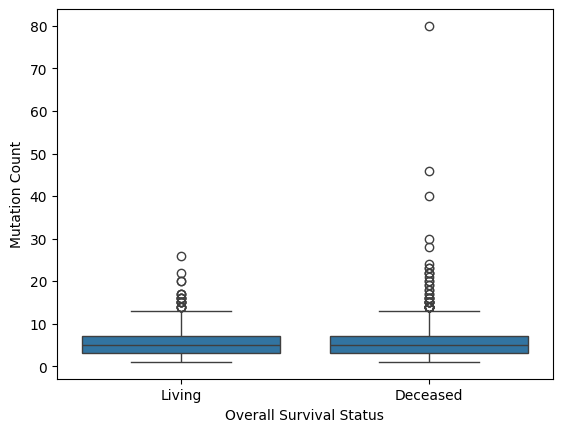

In [168]:
sns.boxplot(x='Overall Survival Status', y='Mutation Count', data=data)

In [169]:
data.shape

(2509, 24)

### Removing Outliers

In [170]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        I_Q_R = Q3 - Q1
        low_fence = Q1 - 1.5 * I_Q_R
        up_fence = Q3 + 1.5 * I_Q_R
        df = df[(df[col] >= low_fence) & (df[col] <= up_fence)]
    return df

# Example usage
numeric_cols = ['Age at Diagnosis','Mutation Count']
data = remove_outliers_iqr(data, numeric_cols)

<Axes: xlabel='Overall Survival Status', ylabel='Age at Diagnosis'>

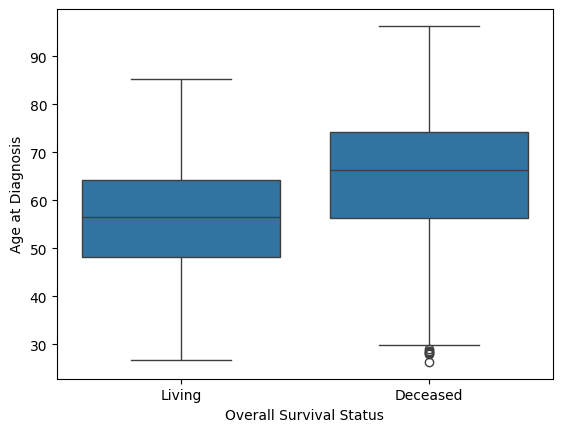

In [171]:
sns.boxplot(x='Overall Survival Status', y='Age at Diagnosis', data=data)

In [172]:
data.shape

(2271, 24)

In [173]:
data.isnull().sum() # Checking for missing values in the DataFrame

Patient ID                          0
Age at Diagnosis                    0
Type of Breast Surgery            496
Cancer Type Detailed                0
Cellularity                       521
Chemotherapy                      475
ER Status                          28
Neoplasm Histologic Grade          91
HER2 Status                       475
Tumor Other Histologic Subtype     86
Hormone Therapy                   475
Inferred Menopausal State         475
Integrative Cluster               475
Lymph nodes examined positive     176
Mutation Count                      0
Nottingham prognostic index       188
Overall Survival (Months)         474
Overall Survival Status           474
PR Status                         475
Radio Therapy                     475
Relapse Free Status (Months)       97
Relapse Free Status                10
Tumor Size                        118
Tumor Stage                       663
dtype: int64

In [174]:
data.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Cellularity,Chemotherapy,ER Status,Neoplasm Histologic Grade,HER2 Status,Tumor Other Histologic Subtype,...,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Tumor Size,Tumor Stage
1,MB-0002,43.19,Breast Conserving,Breast Invasive Ductal Carcinoma,High,No,Positive,3.0,Negative,Ductal/NST,...,2.0,4.020,84.633333,Living,Positive,Yes,83.52,Not Recurred,10.0,1.0
2,MB-0005,48.87,Mastectomy,Breast Invasive Ductal Carcinoma,High,Yes,Positive,2.0,Negative,Ductal/NST,...,2.0,4.030,163.700000,Deceased,Positive,No,151.28,Recurred,15.0,2.0
3,MB-0006,47.68,Mastectomy,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,Positive,2.0,Negative,Mixed,...,1.0,4.050,164.933333,Living,Positive,Yes,162.76,Not Recurred,25.0,2.0
4,MB-0008,76.97,Mastectomy,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,Positive,3.0,Negative,Mixed,...,2.0,6.080,41.366667,Deceased,Positive,Yes,18.55,Recurred,40.0,2.0
5,MB-0010,78.77,Mastectomy,Breast Invasive Ductal Carcinoma,Moderate,No,Positive,3.0,Negative,Ductal/NST,...,4.0,4.062,7.800000,Deceased,Positive,Yes,2.89,Recurred,31.0,4.0


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2271 entries, 1 to 2505
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2271 non-null   object 
 1   Age at Diagnosis                2271 non-null   float64
 2   Type of Breast Surgery          1775 non-null   object 
 3   Cancer Type Detailed            2271 non-null   object 
 4   Cellularity                     1750 non-null   object 
 5   Chemotherapy                    1796 non-null   object 
 6   ER Status                       2243 non-null   object 
 7   Neoplasm Histologic Grade       2180 non-null   float64
 8   HER2 Status                     1796 non-null   object 
 9   Tumor Other Histologic Subtype  2185 non-null   object 
 10  Hormone Therapy                 1796 non-null   object 
 11  Inferred Menopausal State       1796 non-null   object 
 12  Integrative Cluster             1796 no

### Handling the missing Values

In [26]:
def impute_categorical_most_frequent(df, categorical_columns):
    imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_columns] = imputer.fit_transform(df[categorical_columns])
    return df

In [27]:
categorical_cols = ['Type of Breast Surgery','Cancer Type Detailed','Cellularity','Chemotherapy','ER Status','HER2 Status','PR Status','Relapse Free Status']
data = impute_categorical_most_frequent(data, categorical_cols)

In [28]:
def impute_numerical_most_frequent(df, numerical_columns):
    imputer = SimpleImputer(strategy='most_frequent')
    df[numerical_columns] = imputer.fit_transform(df[numerical_columns])
    return df

In [29]:
## numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = ['Mutation Count', 'Tumor Stage', 'Neoplasm Histologic Grade']
data = impute_numerical_most_frequent(data, numerical_cols)

In [30]:
def impute_numerical_mean(df, numerical_columns):
    imputer = SimpleImputer(strategy='mean')
    df[numerical_columns] = imputer.fit_transform(df[numerical_columns])
    return df

In [31]:
numerical_cols = ['Age at Diagnosis', 'Tumor Size'] 
data = impute_numerical_mean(data, numerical_cols)

In [32]:
data.isnull().sum()

Patient ID                          0
Age at Diagnosis                    0
Type of Breast Surgery              0
Cancer Type Detailed                0
Cellularity                         0
Chemotherapy                        0
ER Status                           0
Neoplasm Histologic Grade           0
HER2 Status                         0
Tumor Other Histologic Subtype     86
Hormone Therapy                   475
Inferred Menopausal State         475
Integrative Cluster               475
Lymph nodes examined positive     176
Mutation Count                      0
Nottingham prognostic index       188
Overall Survival (Months)         474
Overall Survival Status           474
PR Status                           0
Radio Therapy                     475
Relapse Free Status (Months)       97
Relapse Free Status                 0
Tumor Size                          0
Tumor Stage                         0
dtype: int64

In [33]:
data.dropna(inplace=True)

In [34]:
data.shape

(1782, 24)

In [35]:
df=data.iloc[:,1:]

In [36]:
df.columns

Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Lymph nodes examined positive', 'Mutation Count',
       'Nottingham prognostic index', 'Overall Survival (Months)',
       'Overall Survival Status', 'PR Status', 'Radio Therapy',
       'Relapse Free Status (Months)', 'Relapse Free Status', 'Tumor Size',
       'Tumor Stage'],
      dtype='object')

In [177]:
data.head(10)

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Cellularity,Chemotherapy,ER Status,Neoplasm Histologic Grade,HER2 Status,Tumor Other Histologic Subtype,...,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Tumor Size,Tumor Stage
1,MB-0002,43.19,Breast Conserving,Breast Invasive Ductal Carcinoma,High,No,Positive,3.0,Negative,Ductal/NST,...,2.0,4.020,84.633333,Living,Positive,Yes,83.52,Not Recurred,10.0,1.0
2,MB-0005,48.87,Mastectomy,Breast Invasive Ductal Carcinoma,High,Yes,Positive,2.0,Negative,Ductal/NST,...,2.0,4.030,163.700000,Deceased,Positive,No,151.28,Recurred,15.0,2.0
3,MB-0006,47.68,Mastectomy,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,Positive,2.0,Negative,Mixed,...,1.0,4.050,164.933333,Living,Positive,Yes,162.76,Not Recurred,25.0,2.0
4,MB-0008,76.97,Mastectomy,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,Positive,3.0,Negative,Mixed,...,2.0,6.080,41.366667,Deceased,Positive,Yes,18.55,Recurred,40.0,2.0
5,MB-0010,78.77,Mastectomy,Breast Invasive Ductal Carcinoma,Moderate,No,Positive,3.0,Negative,Ductal/NST,...,4.0,4.062,7.800000,Deceased,Positive,Yes,2.89,Recurred,31.0,4.0
6,MB-0014,56.45,Breast Conserving,Breast Invasive Ductal Carcinoma,Moderate,Yes,Positive,2.0,Negative,Ductal/NST,...,4.0,4.020,164.333333,Living,Positive,Yes,162.17,Not Recurred,10.0,2.0
8,MB-0022,89.08,Breast Conserving,Breast Mixed Ductal and Lobular Carcinoma,Moderate,No,Positive,2.0,Negative,Mixed,...,1.0,4.058,99.533333,Deceased,Negative,Yes,98.22,Not Recurred,29.0,2.0
9,MB-0025,76.24,NaN,Breast Invasive Ductal Carcinoma,NaN,NaN,Positive,3.0,NaN,Ductal/NST,...,5.0,6.680,NaN,NaN,NaN,NaN,126.32,Recurred,34.0,2.0
10,MB-0028,86.41,Breast Conserving,Breast Invasive Ductal Carcinoma,Moderate,No,Positive,3.0,Negative,Ductal/NST,...,4.0,5.032,36.566667,Deceased,Negative,Yes,36.09,Not Recurred,16.0,2.0
11,MB-0035,84.22,Mastectomy,Breast Invasive Lobular Carcinoma,High,No,Positive,2.0,Negative,Lobular,...,5.0,3.056,36.266667,Deceased,Negative,No,35.79,Recurred,28.0,2.0


### Encoding the Categorical Data

In [37]:
le = LabelEncoder()  ## Creating an instance of LabelEncoder to convert categorical labels into numerical values

In [38]:
df["Overall Survival Status"] =le.fit_transform(df["Overall Survival Status"])

In [39]:
## Convert the Categorical Features to Numerical Features using Label Encoding
cat_columns = df.columns[df.dtypes == 'object']

le = LabelEncoder()
for cat in cat_columns:
    df[cat] = le.fit_transform(df[cat])
df

,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Cellularity,Chemotherapy,ER Status,Neoplasm Histologic Grade,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,...,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Tumor Size,Tumor Stage
1,43.19,0,1,0,0,1,3.0,0,0,1,...,2.0,4.020,84.633333,1,1,1,83.52,0,10.0,1.0
2,48.87,1,1,0,1,1,2.0,0,0,1,...,2.0,4.030,163.700000,0,1,0,151.28,1,15.0,2.0
3,47.68,1,4,2,1,1,2.0,0,4,1,...,1.0,4.050,164.933333,1,1,1,162.76,0,25.0,2.0
4,76.97,1,4,0,1,1,3.0,0,4,1,...,2.0,6.080,41.366667,0,1,1,18.55,1,40.0,2.0
5,78.77,1,1,2,0,1,3.0,0,0,1,...,4.0,4.062,7.800000,0,1,1,2.89,1,31.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,59.20,1,1,0,0,1,2.0,0,0,1,...,2.0,4.030,82.733333,0,1,0,81.64,1,15.0,2.0
1980,43.10,0,2,0,0,1,3.0,0,1,1,...,4.0,5.050,196.866667,1,1,1,194.28,0,25.0,2.0
1981,42.88,1,1,0,0,1,3.0,1,0,0,...,6.0,5.040,44.733333,0,0,1,16.09,1,20.0,2.0
1982,62.90,1,1,0,0,1,3.0,0,0,1,...,4.0,6.050,175.966667,0,1,1,121.18,1,25.0,2.0


In [40]:
type(df)

pandas.core.frame.DataFrame

In [41]:
## Drop all rows from the DataFrame 'df' that contain any missing (NaN) values
df.dropna(inplace=True) 

In [42]:
df.corr()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Cellularity,Chemotherapy,ER Status,Neoplasm Histologic Grade,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,...,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Tumor Size,Tumor Stage
Age at Diagnosis,1.000000,0.118680,0.067814,0.019160,-0.404583,0.281372,-0.101722,-0.129597,0.035936,0.286419,...,0.001683,-0.077101,-0.161005,-0.306851,0.082852,-0.127308,-0.105260,-0.052271,0.054999,0.101472
Type of Breast Surgery,0.118680,1.000000,-0.003344,0.028742,0.061428,-0.007135,0.058679,0.067817,-0.033319,0.019359,...,0.017613,0.145995,-0.101107,-0.189965,-0.050703,-0.511739,-0.097193,0.097964,0.255713,0.234032
Cancer Type Detailed,0.067814,-0.003344,1.000000,0.076001,-0.125682,0.166785,-0.173895,-0.110527,0.745121,0.040283,...,-0.001620,-0.139658,0.044387,-0.028829,0.119429,-0.035054,0.037029,-0.007032,-0.006830,-0.062676
Cellularity,0.019160,0.028742,0.076001,1.000000,-0.074199,0.064929,-0.044845,-0.027639,0.040881,0.033591,...,-0.039610,-0.080516,0.023967,-0.020497,0.028888,-0.014790,0.020541,0.014025,-0.038857,-0.022090
Chemotherapy,-0.404583,0.061428,-0.125682,-0.074199,1.000000,-0.465983,0.262463,0.205167,-0.127698,-0.158857,...,-0.091125,0.421750,-0.158620,0.036138,-0.274347,0.214576,-0.141366,0.135855,0.189352,0.282448
ER Status,0.281372,-0.007135,0.166785,0.064929,-0.465983,1.000000,-0.361644,-0.290097,0.148835,0.383636,...,-0.069739,-0.292847,0.125973,-0.015646,0.541569,-0.089360,0.085334,-0.052308,-0.079490,-0.082611
Neoplasm Histologic Grade,-0.101722,0.058679,-0.173895,-0.044845,0.262463,-0.361644,1.000000,0.197216,-0.239323,-0.038540,...,0.052421,0.583271,-0.121329,-0.097015,-0.305644,0.110273,-0.112440,0.123617,0.125196,0.118450
HER2 Status,-0.129597,0.067817,-0.110527,-0.027639,0.205167,-0.290097,0.197216,1.000000,-0.120008,-0.097593,...,0.051729,0.194166,-0.134074,-0.051735,-0.235925,0.019532,-0.122748,0.109483,0.044326,0.074008
Tumor Other Histologic Subtype,0.035936,-0.033319,0.745121,0.040881,-0.127698,0.148835,-0.239323,-0.120008,1.000000,-0.000745,...,-0.010814,-0.200811,0.093731,0.043283,0.116969,-0.023657,0.093218,-0.057632,-0.040605,-0.099138
Hormone Therapy,0.286419,0.019359,0.040283,0.033591,-0.158857,0.383636,-0.038540,-0.097593,-0.000745,1.000000,...,-0.115159,0.153384,-0.107870,-0.044641,0.158789,0.088046,-0.074220,-0.010006,0.079181,0.207372


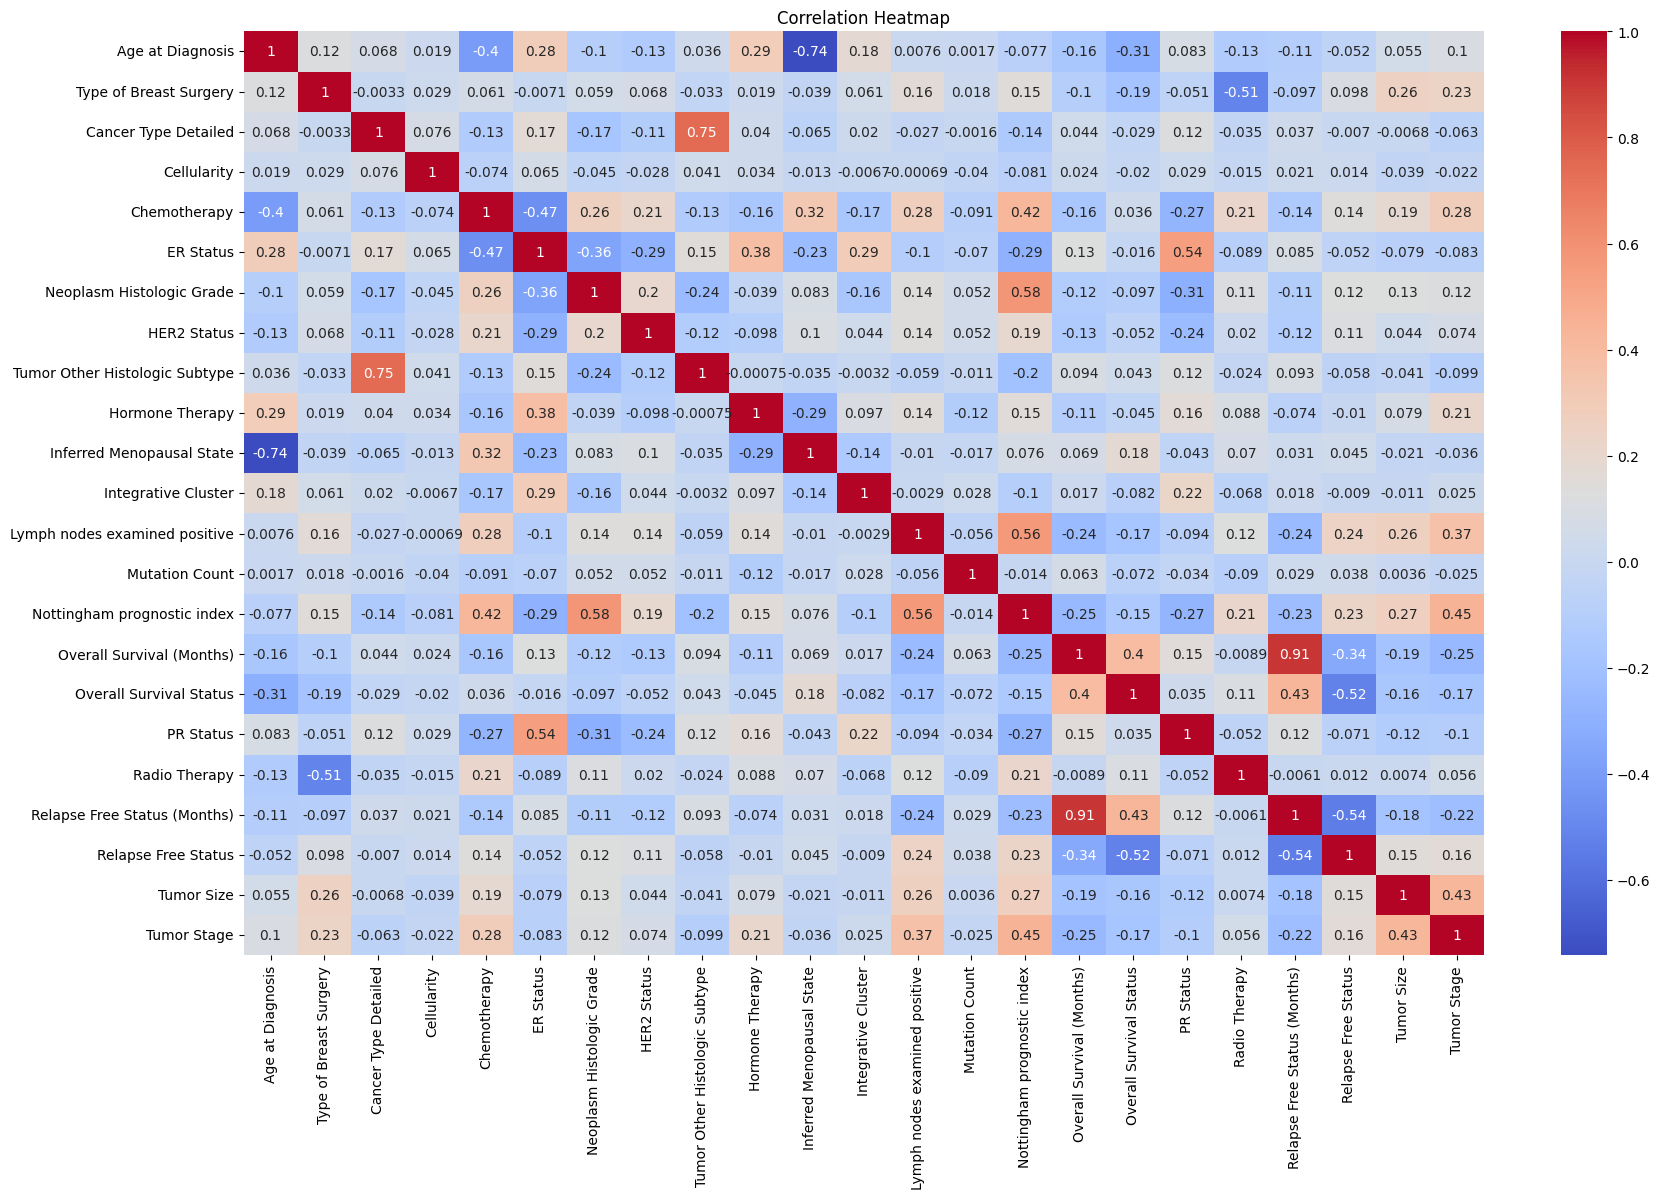

In [43]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Get Correlation of "Overall Survival Status" with other variables

<Axes: >

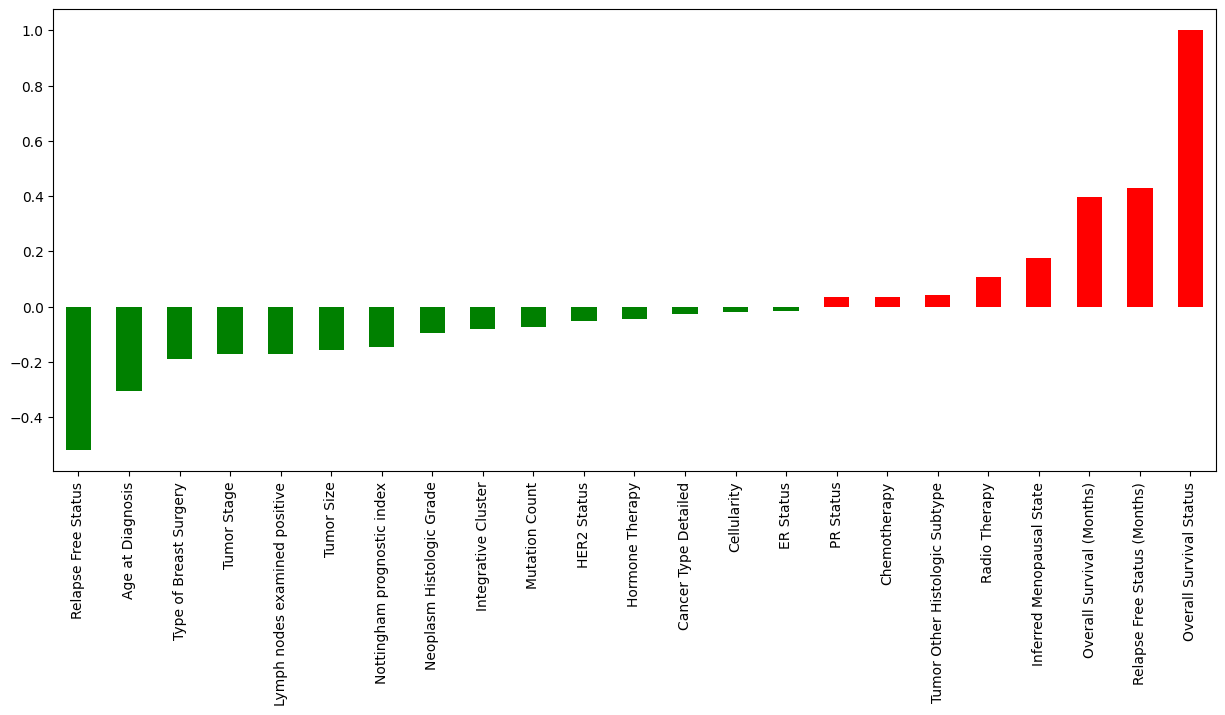

In [44]:
plt.figure(figsize=(15,6))
corr_Sur = df.corr()["Overall Survival Status"].sort_values()
corr_Sur.plot(kind="bar",color = ['green' if i<0 else 'red' for i in corr_Sur])

### Standardizing the Numeric Dataset

In [45]:
## Creating an instance of StandardScaler for feature scaling.
scaler = StandardScaler()
df_num = scaler.fit_transform(df)
df_imputed = pd.DataFrame(scaler.inverse_transform(df_num), columns=df.columns)
df_scaled = df_imputed
df_scaled.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Cellularity,Chemotherapy,ER Status,Neoplasm Histologic Grade,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,...,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Tumor Size,Tumor Stage
0,43.19,0.0,1.0,0.0,2.775558e-17,1.0,3.0,-1.387779e-17,0.0,1.0,...,2.0,4.020,84.633333,1.0,1.0,1.0,83.52,0.0,10.0,1.0
1,48.87,1.0,1.0,0.0,1.000000e+00,1.0,2.0,-1.387779e-17,0.0,1.0,...,2.0,4.030,163.700000,0.0,1.0,0.0,151.28,1.0,15.0,2.0
2,47.68,1.0,4.0,2.0,1.000000e+00,1.0,2.0,-1.387779e-17,4.0,1.0,...,1.0,4.050,164.933333,1.0,1.0,1.0,162.76,0.0,25.0,2.0
3,76.97,1.0,4.0,0.0,1.000000e+00,1.0,3.0,-1.387779e-17,4.0,1.0,...,2.0,6.080,41.366667,0.0,1.0,1.0,18.55,1.0,40.0,2.0
4,78.77,1.0,1.0,2.0,2.775558e-17,1.0,3.0,-1.387779e-17,0.0,1.0,...,4.0,4.062,7.800000,0.0,1.0,1.0,2.89,1.0,31.0,4.0


In [46]:
df_scaled.corr()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Cellularity,Chemotherapy,ER Status,Neoplasm Histologic Grade,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,...,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Tumor Size,Tumor Stage
Age at Diagnosis,1.000000,0.118680,0.067814,0.019160,-0.404583,0.281372,-0.101722,-0.129597,0.035936,0.286419,...,0.001683,-0.077101,-0.161005,-0.306851,0.082852,-0.127308,-0.105260,-0.052271,0.054999,0.101472
Type of Breast Surgery,0.118680,1.000000,-0.003344,0.028742,0.061428,-0.007135,0.058679,0.067817,-0.033319,0.019359,...,0.017613,0.145995,-0.101107,-0.189965,-0.050703,-0.511739,-0.097193,0.097964,0.255713,0.234032
Cancer Type Detailed,0.067814,-0.003344,1.000000,0.076001,-0.125682,0.166785,-0.173895,-0.110527,0.745121,0.040283,...,-0.001620,-0.139658,0.044387,-0.028829,0.119429,-0.035054,0.037029,-0.007032,-0.006830,-0.062676
Cellularity,0.019160,0.028742,0.076001,1.000000,-0.074199,0.064929,-0.044845,-0.027639,0.040881,0.033591,...,-0.039610,-0.080516,0.023967,-0.020497,0.028888,-0.014790,0.020541,0.014025,-0.038857,-0.022090
Chemotherapy,-0.404583,0.061428,-0.125682,-0.074199,1.000000,-0.465983,0.262463,0.205167,-0.127698,-0.158857,...,-0.091125,0.421750,-0.158620,0.036138,-0.274347,0.214576,-0.141366,0.135855,0.189352,0.282448
ER Status,0.281372,-0.007135,0.166785,0.064929,-0.465983,1.000000,-0.361644,-0.290097,0.148835,0.383636,...,-0.069739,-0.292847,0.125973,-0.015646,0.541569,-0.089360,0.085334,-0.052308,-0.079490,-0.082611
Neoplasm Histologic Grade,-0.101722,0.058679,-0.173895,-0.044845,0.262463,-0.361644,1.000000,0.197216,-0.239323,-0.038540,...,0.052421,0.583271,-0.121329,-0.097015,-0.305644,0.110273,-0.112440,0.123617,0.125196,0.118450
HER2 Status,-0.129597,0.067817,-0.110527,-0.027639,0.205167,-0.290097,0.197216,1.000000,-0.120008,-0.097593,...,0.051729,0.194166,-0.134074,-0.051735,-0.235925,0.019532,-0.122748,0.109483,0.044326,0.074008
Tumor Other Histologic Subtype,0.035936,-0.033319,0.745121,0.040881,-0.127698,0.148835,-0.239323,-0.120008,1.000000,-0.000745,...,-0.010814,-0.200811,0.093731,0.043283,0.116969,-0.023657,0.093218,-0.057632,-0.040605,-0.099138
Hormone Therapy,0.286419,0.019359,0.040283,0.033591,-0.158857,0.383636,-0.038540,-0.097593,-0.000745,1.000000,...,-0.115159,0.153384,-0.107870,-0.044641,0.158789,0.088046,-0.074220,-0.010006,0.079181,0.207372


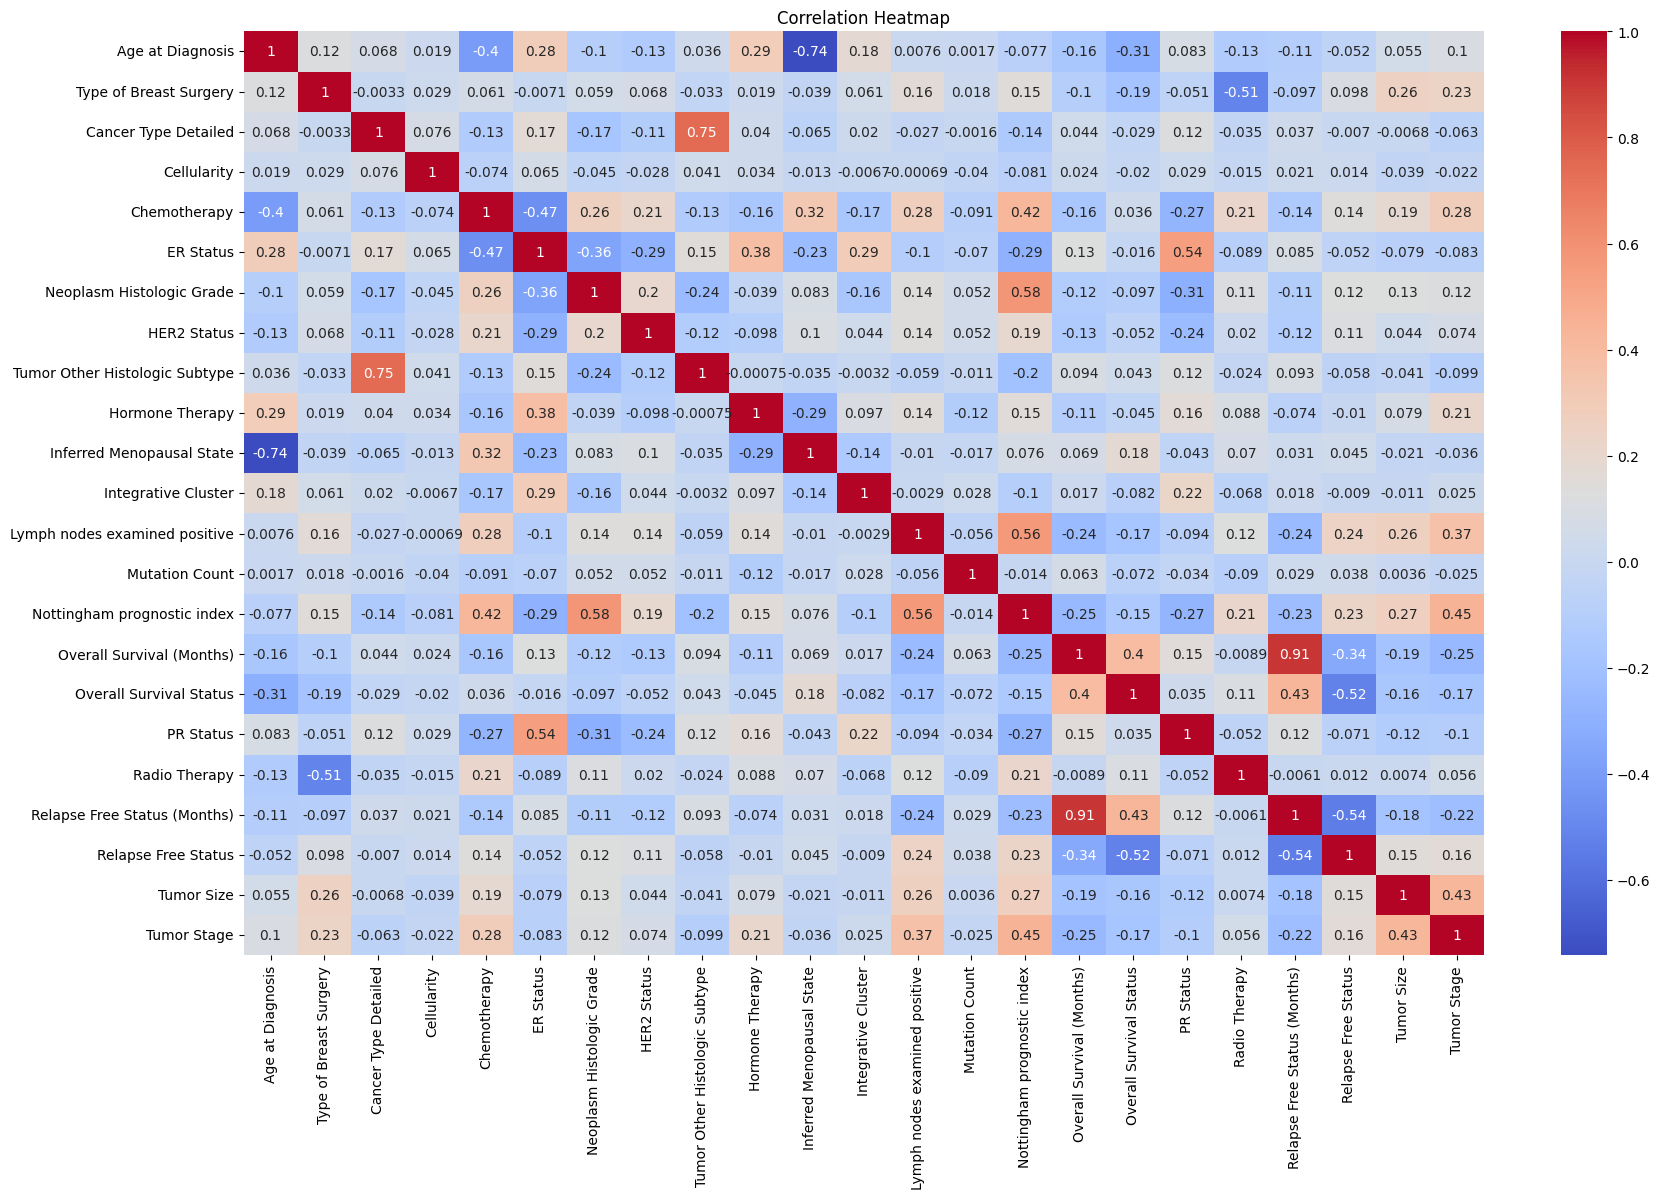

In [47]:
# Visualize a correlation heatmap:
correlation_matrix = df_scaled.corr()
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **Step 4 : Exploratory Data Analysis**

In [48]:
data.describe()

,Age at Diagnosis,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage
count,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000
mean,61.086414,2.436588,1.982604,5.234568,4.024968,125.785672,110.603653,26.216095,1.813692
std,12.940183,0.649940,4.043313,2.711047,1.144023,76.564136,76.881953,15.181211,0.546617
min,26.360000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,51.390000,2.000000,0.000000,3.000000,3.046000,60.875000,41.787500,17.000000,1.000000
50%,61.635000,3.000000,0.000000,5.000000,4.042000,116.983333,100.675000,23.000000,2.000000
75%,70.552500,3.000000,2.000000,7.000000,5.040000,185.533333,169.552500,30.000000,2.000000
max,96.290000,3.000000,45.000000,13.000000,6.360000,355.200000,331.180000,182.000000,4.000000


In [49]:
data.corr(numeric_only=True)

,Age at Diagnosis,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage
Age at Diagnosis,1.000000,-0.101722,0.007551,0.001683,-0.077101,-0.161005,-0.105260,0.054999,0.101472
Neoplasm Histologic Grade,-0.101722,1.000000,0.140703,0.052421,0.583271,-0.121329,-0.112440,0.125196,0.118450
Lymph nodes examined positive,0.007551,0.140703,1.000000,-0.056433,0.561729,-0.241718,-0.241215,0.260959,0.365632
Mutation Count,0.001683,0.052421,-0.056433,1.000000,-0.013739,0.063185,0.028908,0.003564,-0.024675
Nottingham prognostic index,-0.077101,0.583271,0.561729,-0.013739,1.000000,-0.251082,-0.227306,0.271372,0.446592
Overall Survival (Months),-0.161005,-0.121329,-0.241718,0.063185,-0.251082,1.000000,0.906268,-0.190598,-0.252263
Relapse Free Status (Months),-0.105260,-0.112440,-0.241215,0.028908,-0.227306,0.906268,1.000000,-0.184915,-0.219898
Tumor Size,0.054999,0.125196,0.260959,0.003564,0.271372,-0.190598,-0.184915,1.000000,0.426546
Tumor Stage,0.101472,0.118450,0.365632,-0.024675,0.446592,-0.252263,-0.219898,0.426546,1.000000


### Age at Diagnosis vs Tumor Size

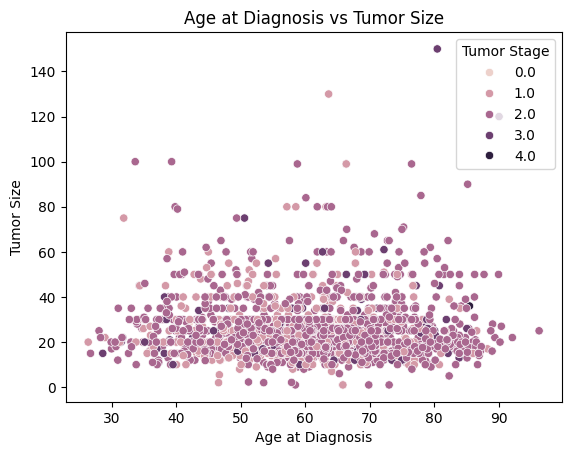

In [50]:
sns.scatterplot(x=data["Age at Diagnosis"], y=df_scaled["Tumor Size"], hue=data["Tumor Stage"])
plt.title("Age at Diagnosis vs Tumor Size")
plt.show()

- Tumor size appears to be fairly distributed across all ages.
- Patients from age ~30 to 90 can have both small and large tumor sizes.
- This suggests that tumor size doesn’t strongly depend on age at diagnosis.

## **A. Distribution of Data**

### 1. Distribution by Chemotherapy

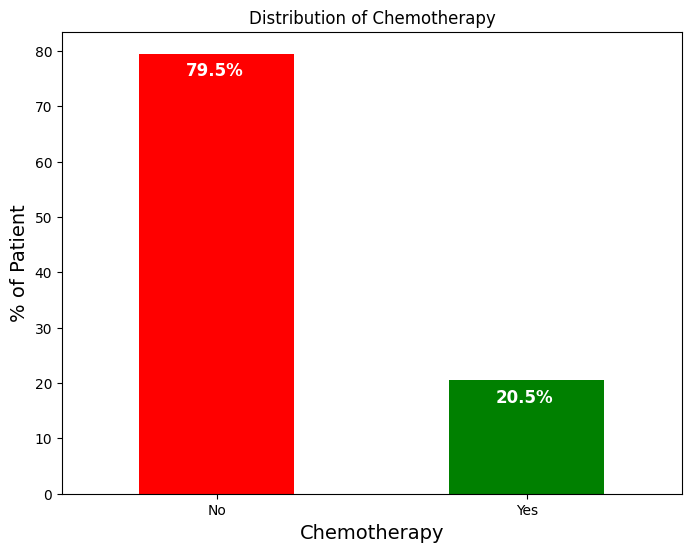

In [51]:
surgery_counts = data['Chemotherapy'].value_counts()
ax = ( surgery_counts* 100.0 / len(data)).plot(kind='bar',stacked=True,rot=0,color=['red', 'green'],figsize=(8, 6))

plt.xlabel("Chemotherapy",fontsize=14)
plt.ylabel("% of Patient",fontsize=14)
plt.title("Distribution of Chemotherapy")

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to the list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0,str(round((i.get_height() / total), 1)) + '%',fontsize=12,color='white',weight='bold')

### 2. Cellularity Distribution

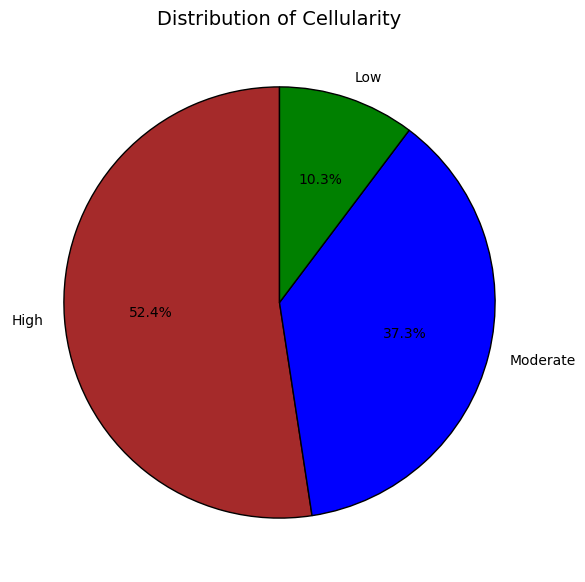

In [52]:
# Count the occurrences of each category
cellularity_counts = data["Cellularity"].value_counts()
colors = ['brown', 'blue', 'green']
plt.figure(figsize=(7, 7))
plt.pie(cellularity_counts, labels=cellularity_counts.index, autopct='%1.1f%%', colors=colors, 
        startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("Distribution of Cellularity", fontsize=14)
plt.show()

 ### 3. Type of Breast Surgery Distribution

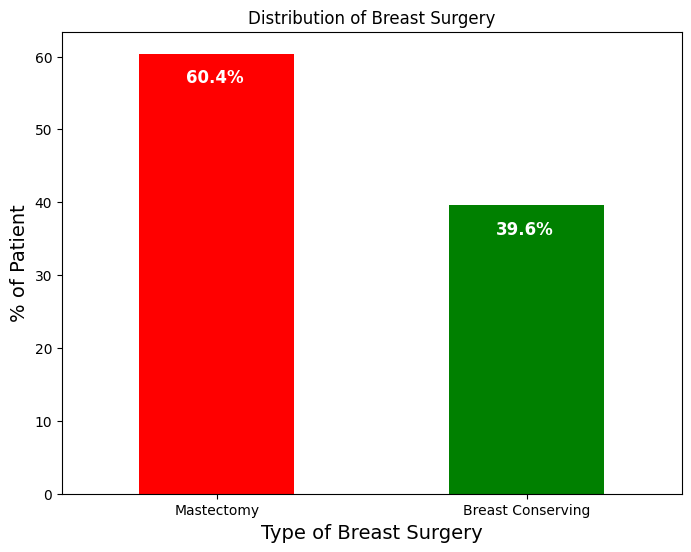

In [53]:
surgery_counts = data['Type of Breast Surgery'].value_counts()
ax = ( surgery_counts* 100.0 / len(data)).plot(kind='bar',stacked=True,rot=0,color=['red', 'green'],figsize=(8, 6))

plt.xlabel("Type of Breast Surgery",fontsize=14)
plt.ylabel("% of Patient",fontsize=14)
plt.title("Distribution of Breast Surgery")

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to the list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0,str(round((i.get_height() / total), 1)) + '%',fontsize=12,color='white',weight='bold')

Insights : 60.3% of patients underwent a mastectomy. This indicates that the majority of patients had their entire breast removed as part of their treatment

### 4. Overall Survival Status Distribution

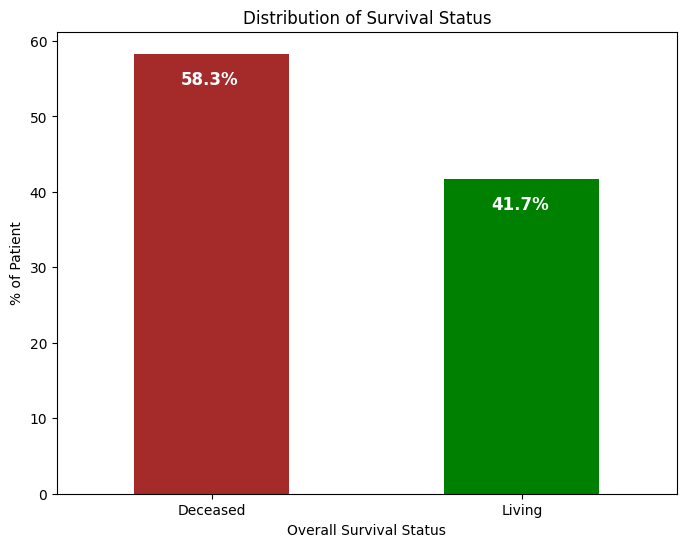

In [54]:
plt.figure(figsize=(8,6))
survival_counts = data["Overall Survival Status"].value_counts()
ax = (survival_counts * 100/len(data)).plot(kind="bar",stacked=True,rot=0,color=['brown','green'])

plt.xlabel("Overall Survival Status")
plt.ylabel("% of Patient")
plt.title("Distribution of Survival Status")

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to the list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:  # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0,str(round((i.get_height() / total), 1)) + '%',fontsize=12,color='white',weight='bold')

### 5. Tumor Stage Distribution

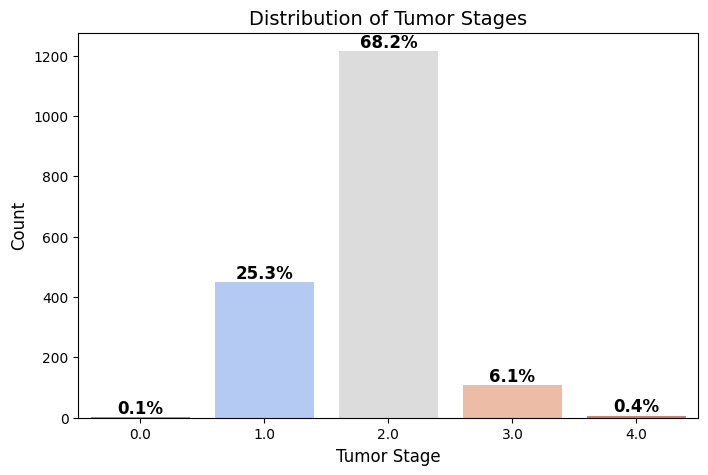

In [55]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=data["Tumor Stage"], palette="coolwarm") ## Create the count plot with a specific color palette

total = len(data["Tumor Stage"])  ## Get the total number of samples
for p in ax.patches:  ## Add percentage labels on top of the bars
    percentage = f'{100 * p.get_height() / total:.1f}%'  ## Calculate percentage
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title("Distribution of Tumor Stages", fontsize=14)
plt.xlabel("Tumor Stage", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

Insights: 68.3% of the tumors are in Stage 2, which is by far the most frequent, This may suggest that most tumors are being detected at a moderately advanced stage, but not yet late-stage.

### 6. Relapse Free Status (Pie Chart)

([<matplotlib.patches.Wedge at 0x1d2ca435c10>,
 [Text(-1.0570665544563618, -0.3043194036694932, 'Not Recurred'),
  Text(1.0570665544563616, 0.3043194036694935, 'Recurred')],
 [Text(-0.5765817569761972, -0.16599240200154172, '58.9%'),
  Text(0.5765817569761972, 0.1659924020015419, '41.1%')])

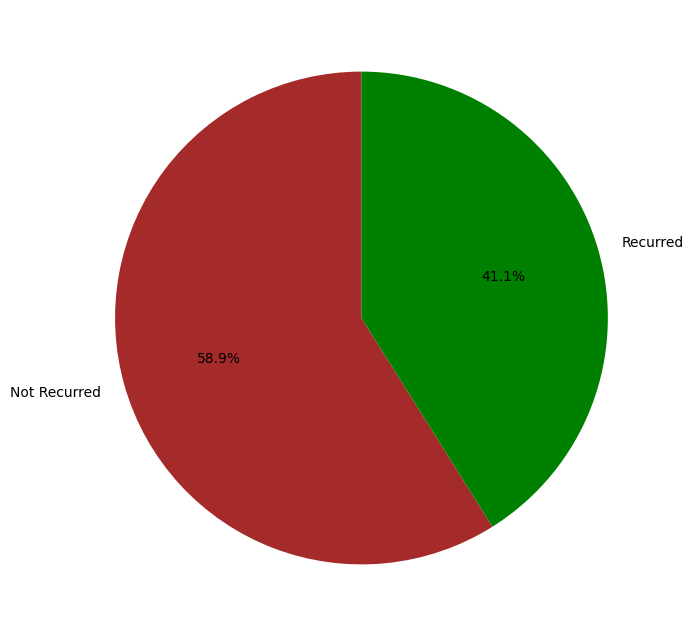

In [56]:
relapse_counts = data['Relapse Free Status'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(relapse_counts,labels = relapse_counts.index, autopct="%1.1f%%", colors=['brown','green'],startangle=90)

### 7. Radio Therapy (Pie Chart)

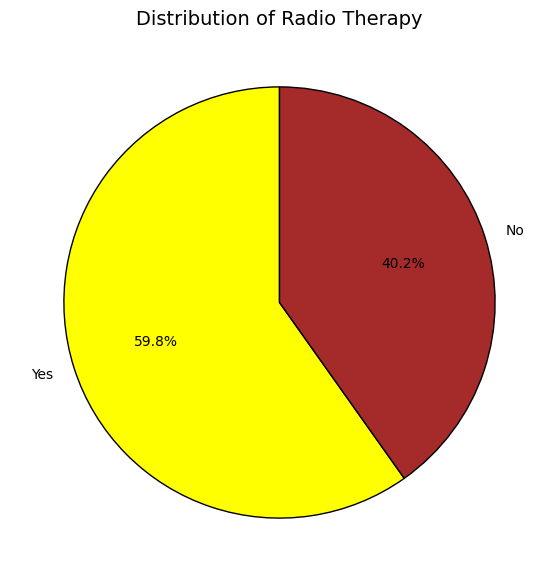

In [57]:
# Count the occurrences of each category
radiotherapy_counts = data["Radio Therapy"].value_counts()
colors = ['yellow', 'brown']
plt.figure(figsize=(7, 7))
plt.pie(radiotherapy_counts, labels=radiotherapy_counts.index, autopct='%1.1f%%', colors=colors, 
        startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("Distribution of Radio Therapy", fontsize=14)
plt.show()

### 8. Age at Diagnosis

Text(0.5, 1.0, 'No of Patients by their Age')

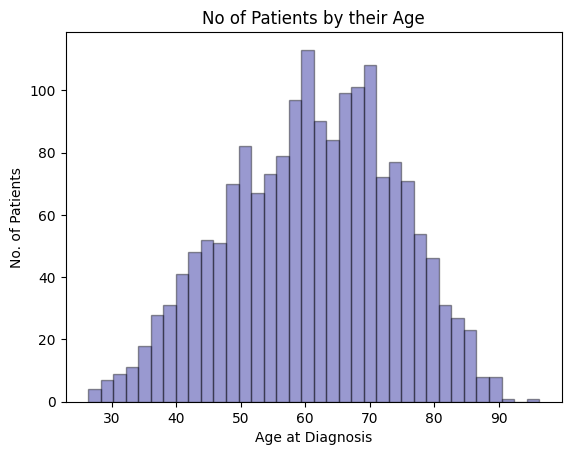

In [58]:
sns.distplot(data['Age at Diagnosis'], hist=True, kde=False,bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
plt.xlabel("Age at Diagnosis")
plt.ylabel("No. of Patients")
plt.title("No of Patients by their Age")

### 9. Tumor Size

Text(0.5, 1.0, 'No of Patients by Tumor Size')

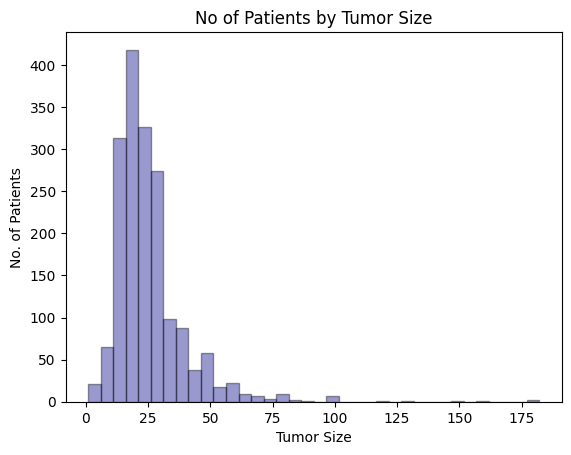

In [59]:
sns.distplot(data['Tumor Size'], hist=True, kde=False,bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
plt.xlabel("Tumor Size")
plt.ylabel("No. of Patients")
plt.title("No of Patients by Tumor Size")

## **B. Overall Survival Status vs Other Variables**

### 1. Overall Survival Status vs Tumor Stage

<Axes: xlabel='Tumor Stage', ylabel='count'>

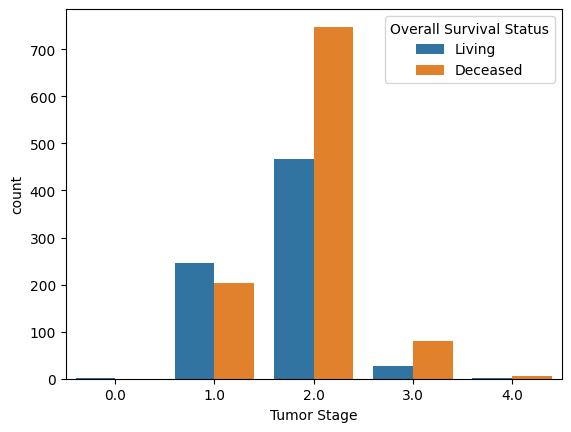

In [60]:
sns.countplot(x='Tumor Stage', hue='Overall Survival Status', data=data)

### 2. Overall Survival Status vs ER Status

<Axes: xlabel='ER Status'>

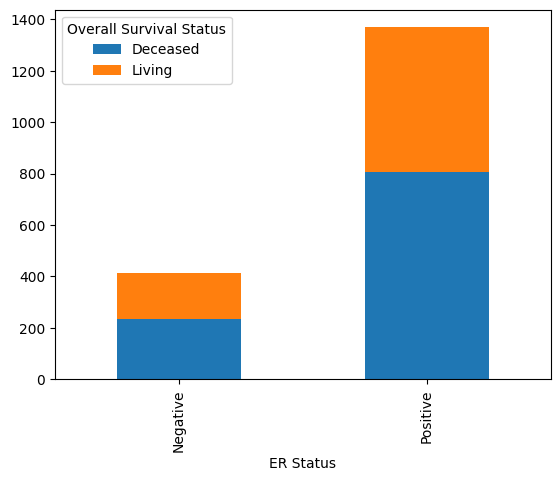

In [61]:
pd.crosstab(data['ER Status'], data['Overall Survival Status']).plot(kind='bar', stacked=True)

### 3. Overall Survival Status vs Age at Diagnosis

<Axes: xlabel='Overall Survival Status', ylabel='Age at Diagnosis'>

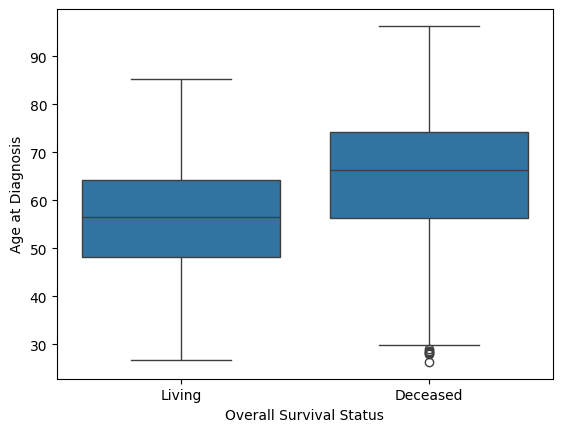

In [62]:
sns.boxplot(x='Overall Survival Status', y='Age at Diagnosis', data=data)

### 4. Overall Survival Status vs Chemotherapy

<Axes: xlabel='Chemotherapy', ylabel='count'>

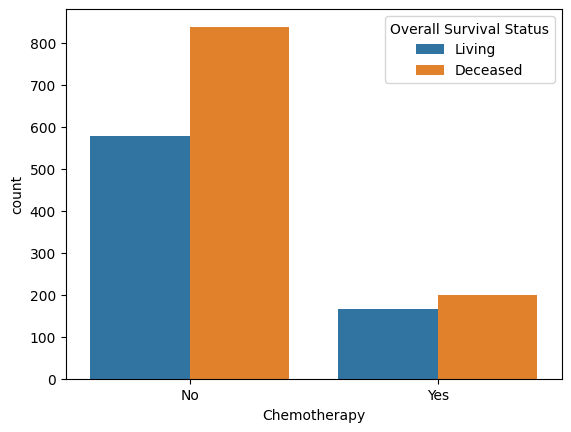

In [63]:
sns.countplot(x='Chemotherapy', hue='Overall Survival Status', data=data)

### 5. Overall Survival Status vs Mutation Count

<Axes: xlabel='Overall Survival Status', ylabel='Mutation Count'>

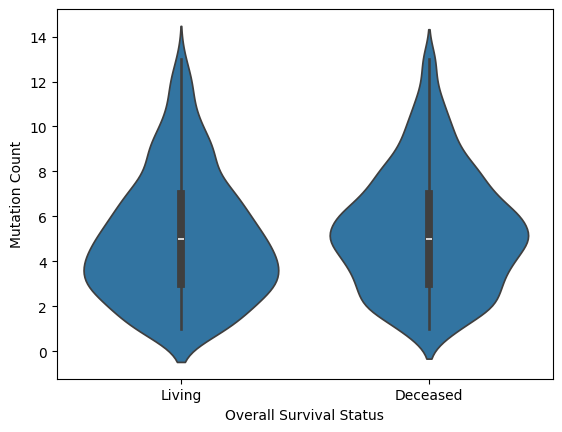

In [64]:
sns.violinplot(x='Overall Survival Status', y='Mutation Count', data=data)

### 6. Survival vs ER Status & PR Status 

In [65]:
df1 = pd.melt(data,id_vars=['Overall Survival Status'],value_vars=['PR Status','ER Status'])

In [66]:
df1.head()

,Overall Survival Status,variable,value
0,Living,PR Status,Positive
1,Deceased,PR Status,Positive
2,Living,PR Status,Positive
3,Deceased,PR Status,Positive
4,Deceased,PR Status,Positive


In [67]:
df2 = df1.groupby(["variable","value"]).count().unstack()

In [68]:
df2

Overall Survival Status         
value                    Negative Positive
variable                                  
ER Status                     413     1369
PR Status                     828      954

In [69]:
df3 = df2/len(data)*100

In [70]:
df3

Overall Survival Status           
value                    Negative   Positive
variable                                    
ER Status               23.176207  76.823793
PR Status               46.464646  53.535354

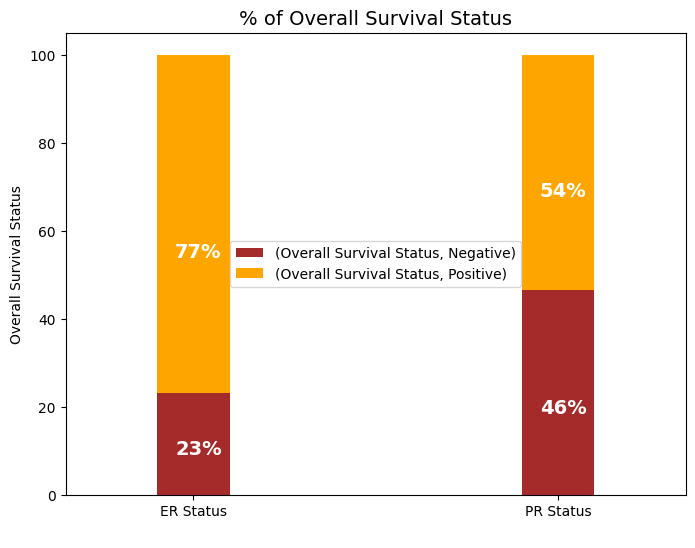

In [71]:
ay = df3.plot(kind="bar",color=["brown","orange"],stacked=True, figsize=(8,6),rot = 0, width = 0.2)
plt.title("% of Overall Survival Status",size=14)
plt.ylabel("Overall Survival Status")
plt.xlabel(" ")
plt.legend(loc="center")

for p in ay.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ay.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white',weight = 'bold',size = 14)

### 7. Overall Survival Status vs Integrative Cluster

<Axes: xlabel='Integrative Cluster'>

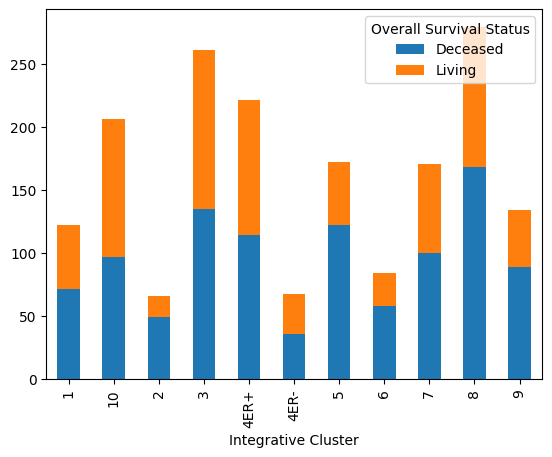

In [72]:
pd.crosstab(data['Integrative Cluster'], data['Overall Survival Status']).plot(kind='bar', stacked=True)

## **C. Some Other Visualization**

### 1. Lymph Nodes Positive vs Tumor Stage (Violin Plot)

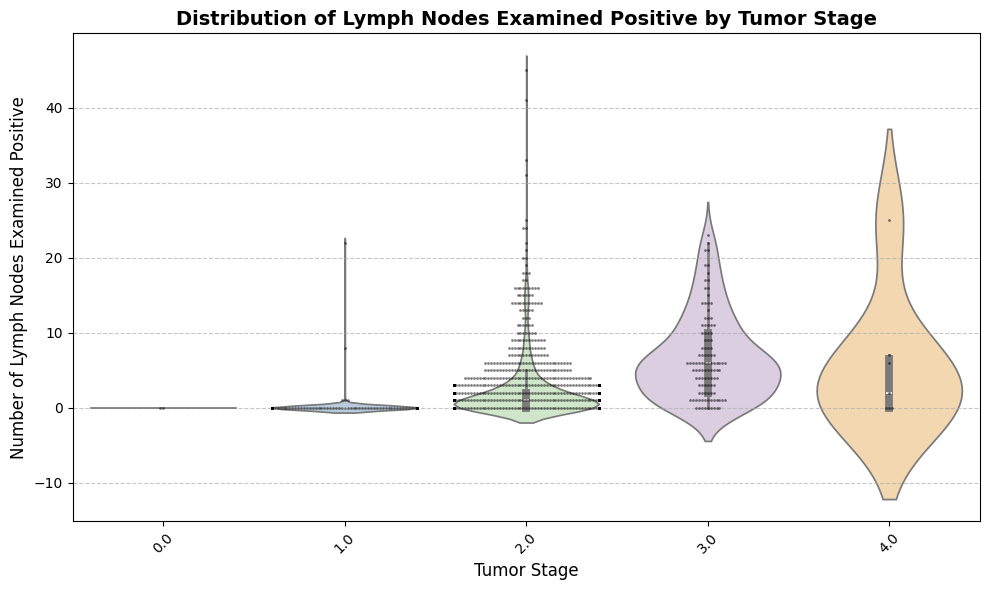

In [73]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Tumor Stage',y='Lymph nodes examined positive',data=data,palette='Pastel1',inner='box',  # show boxplot inside the violin
    scale='width')

sns.swarmplot(x='Tumor Stage',y='Lymph nodes examined positive',data=data,color='k',size=2,alpha=0.5)

plt.title("Distribution of Lymph Nodes Examined Positive by Tumor Stage", fontsize=14, fontweight='bold')
plt.xlabel("Tumor Stage", fontsize=12)
plt.ylabel("Number of Lymph Nodes Examined Positive", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 2. Relapse Free Status vs Treatment Types

<Axes: xlabel='Hormone Therapy', ylabel='count'>

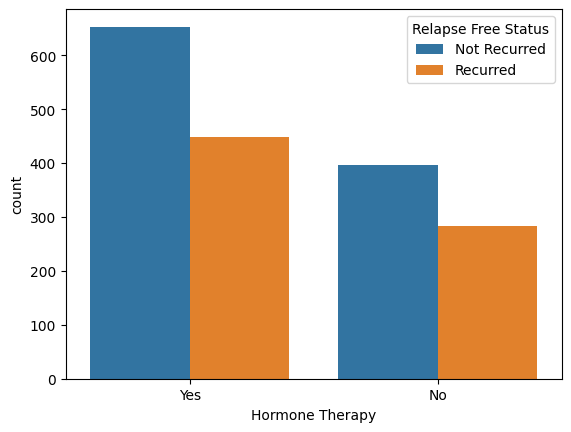

In [74]:
sns.countplot(x='Hormone Therapy', hue='Relapse Free Status', data=data)

### 4. Biomarker Combinations (Heatmap)

<Axes: >

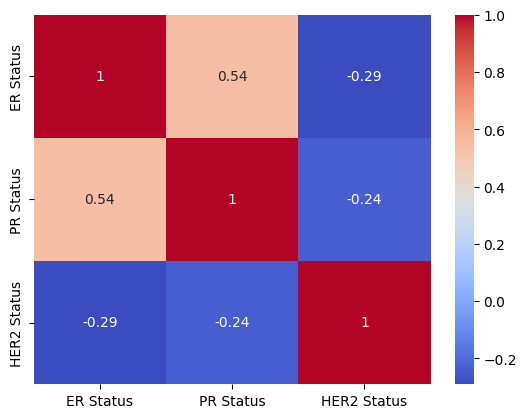

In [75]:
biomarkers = data[['ER Status', 'PR Status', 'HER2 Status']].replace({'Positive': 1, 'Negative': 0})
sns.heatmap(biomarkers.corr(), annot=True, cmap='coolwarm')

### 5. Cellularity vs Tumor Stage

<Axes: xlabel='Tumor Stage', ylabel='count'>

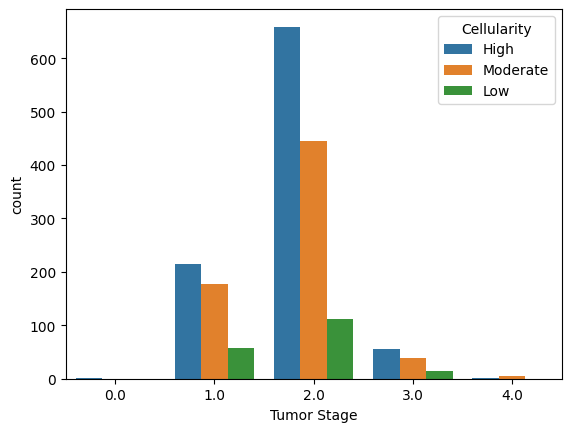

In [76]:
sns.countplot(x='Tumor Stage', hue='Cellularity', data=data)

## **Step 5 : Feature Engineering**

Feature engineering is the process of creating, transforming, or selecting features (variables, columns) from raw data to improve the performance of machine learning models.

In [77]:
df_scaled.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Cellularity,Chemotherapy,ER Status,Neoplasm Histologic Grade,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,...,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Tumor Size,Tumor Stage
0,43.19,0.0,1.0,0.0,2.775558e-17,1.0,3.0,-1.387779e-17,0.0,1.0,...,2.0,4.020,84.633333,1.0,1.0,1.0,83.52,0.0,10.0,1.0
1,48.87,1.0,1.0,0.0,1.000000e+00,1.0,2.0,-1.387779e-17,0.0,1.0,...,2.0,4.030,163.700000,0.0,1.0,0.0,151.28,1.0,15.0,2.0
2,47.68,1.0,4.0,2.0,1.000000e+00,1.0,2.0,-1.387779e-17,4.0,1.0,...,1.0,4.050,164.933333,1.0,1.0,1.0,162.76,0.0,25.0,2.0
3,76.97,1.0,4.0,0.0,1.000000e+00,1.0,3.0,-1.387779e-17,4.0,1.0,...,2.0,6.080,41.366667,0.0,1.0,1.0,18.55,1.0,40.0,2.0
4,78.77,1.0,1.0,2.0,2.775558e-17,1.0,3.0,-1.387779e-17,0.0,1.0,...,4.0,4.062,7.800000,0.0,1.0,1.0,2.89,1.0,31.0,4.0


In [78]:
features = df_scaled.drop(columns=['Overall Survival Status'])

In [79]:
target = df_scaled['Overall Survival Status']

In [80]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(features)

# Convert to DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2','PC3','PC4','PC5'])

In [82]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-47.425875,-7.885603,-19.316773,-18.196780,-1.352837
1,56.066589,-0.562384,-10.525679,-10.737751,0.287585
2,64.798629,-7.837144,-0.462391,-12.917653,1.718512
3,-125.439229,3.522069,11.713934,13.502376,4.749019
4,-159.902213,-9.088619,1.063635,14.283204,-3.112060


## **Step 6 : Splitting the Data**

### Train Test Split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=42)

In [84]:
X_train.shape, y_train.shape

((1425, 22), (1425,))

In [85]:
X_test.shape, y_test.shape

((357, 22), (357,))

## **Step 7 : Model Selection, Training, Evaluation and Hyperparameter Tunning**

### **1. Logistic Regression**

In [86]:
model_lr = LogisticRegression(random_state=42)

In [87]:
model_lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [88]:
y_pred_lr = model_lr.predict(X_test)

In [89]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       204
         1.0       0.75      0.75      0.75       153

    accuracy                           0.79       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357



In [90]:
accuracy_score(y_test,y_pred_lr)

0.7871148459383753

In [91]:
precision_score(y_test,y_pred_lr)

0.7516339869281046

In [92]:
recall_score(y_test,y_pred_lr,average='weighted')

0.7871148459383753

In [93]:
f1_score(y_test,y_pred_lr,average='weighted')

0.7871148459383753

#### Hyperparameter Tunning for LR

In [94]:
grid_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [100, 200, 500],  # Iterations for convergence
    'tol': [1e-4, 1e-3, 1e-2]  # Tolerance for stopping criteria
}

In [95]:
grid_search = GridSearchCV(model_lr, grid_params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.001, 0.01]},
             verbose=1)

In [96]:
# Find the best parameters
best_parameter = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameter)
print("Best Score:", best_score)


Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001}
Best Score: 0.8329824561403509


In [97]:
# Fit the model with the best parameters
tuned_model_lr = LogisticRegression(**best_parameter)

In [98]:
tuned_model_lr.fit(X_train, y_train)

LogisticRegression(C=1, solver='newton-cg', tol=0.001)

In [99]:
y_pred_tuned_lr = tuned_model_lr.predict(X_test)

In [100]:
print(classification_report(y_test,y_pred_tuned_lr))

              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82       204
         1.0       0.75      0.80      0.78       153

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.81      0.80      0.80       357



#### Plot the confusion matrix as a heatmap

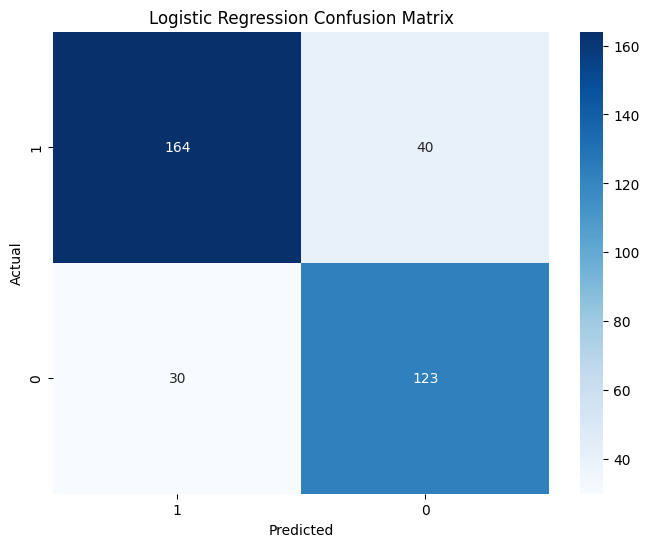

In [101]:
confusion = confusion_matrix(y_test, y_pred_tuned_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=df["Overall Survival Status"].unique(),
            yticklabels=df["Overall Survival Status"].unique())
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### AUC-ROC Curve Visualization

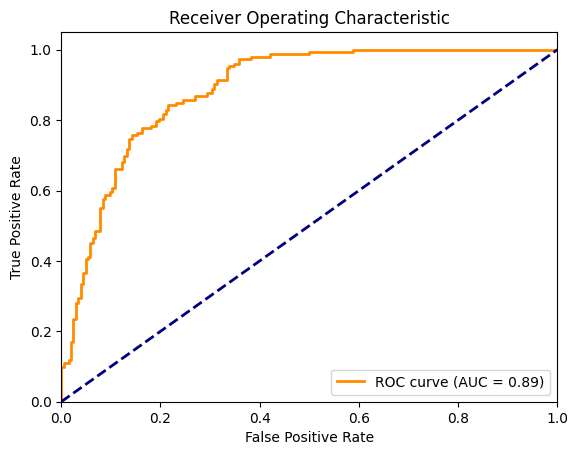

In [102]:
y_pred_lr_prob = tuned_model_lr.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_lr_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_lr_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### **2. Decision Tree Classifier**

In [103]:
model_dt = DecisionTreeClassifier(random_state=42)

In [104]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [105]:
y_pred_dt = model_dt.predict(X_test)

In [106]:
accuracy_score(y_test,y_pred_dt)

0.7310924369747899

In [107]:
precision_score(y_test,y_pred_dt)

0.7111111111111111

In [108]:
recall_score(y_test,y_pred_dt)

0.6274509803921569

In [109]:
f1_score(y_test,y_pred_dt)

0.6666666666666666

In [110]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77       204
         1.0       0.71      0.63      0.67       153

    accuracy                           0.73       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.73      0.73      0.73       357



#### Hyperparameter tunning for Dicision Tree

In [111]:
grid_params_dt = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples per leaf
}

In [112]:
grid_search_dt = GridSearchCV(model_dt, grid_params_dt, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [113]:
best_parameter_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters:", best_parameter_dt)
print("Best Score:", best_score_dt)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.7705263157894737


In [114]:
tuned_model_dt = DecisionTreeClassifier(**best_parameter_dt)
tuned_model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4)

In [115]:
y_pred_tuned_dt =tuned_model_dt.predict(X_test)

In [116]:
print(classification_report(y_test,y_pred_tuned_dt))

              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80       204
         1.0       0.75      0.68      0.71       153

    accuracy                           0.77       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357



#### Plot the confusion matrix as a heatmap

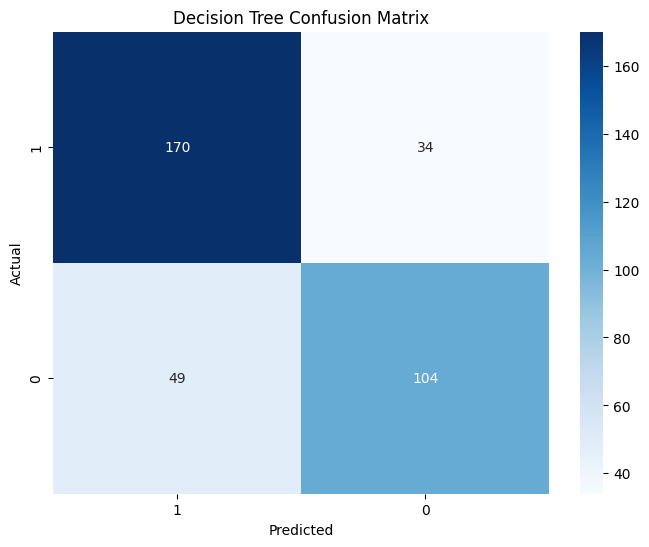

In [117]:
confusion = confusion_matrix(y_test,y_pred_tuned_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=df["Overall Survival Status"].unique(),
            yticklabels=df["Overall Survival Status"].unique())
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **3. Random Forest Classifier**

In [118]:
model_rf = RandomForestClassifier(random_state=42)

In [119]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [120]:
y_pred_rf = model_rf.predict(X_test)

In [121]:
accuracy_score(y_test,y_pred_rf)

0.803921568627451

In [122]:
precision_score(y_test,y_pred_rf)

0.7943262411347518

In [123]:
recall_score(y_test,y_pred_rf)

0.7320261437908496

In [124]:
f1_score(y_test,y_pred_rf)

0.7619047619047619

In [125]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       204
         1.0       0.79      0.73      0.76       153

    accuracy                           0.80       357
   macro avg       0.80      0.79      0.80       357
weighted avg       0.80      0.80      0.80       357



In [126]:
# Define the hyperparameter grid
grid_params_rf = {
    'n_estimators': [25, 50, 75, 100],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples per leaf
    'bootstrap': [True, False]  # Whether to use bootstrap sampling
}

In [127]:
grid_search = GridSearchCV(model_rf, grid_params_rf, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 75, 100]},
             verbose=1)

In [128]:
best_parameter = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameter)
print("Best Score:", best_score)

Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8287719298245614


In [129]:
# Fit the model with the best parameters
tuned_model_rf = RandomForestClassifier(**best_parameter)
tuned_model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=4,
                       n_estimators=50)

In [130]:
# Classification Report of the Random Forest Model

y_pred_tuned_rf = tuned_model_rf.predict(X_test)
print(classification_report(y_test, y_pred_tuned_rf))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       204
         1.0       0.77      0.73      0.74       153

    accuracy                           0.79       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357



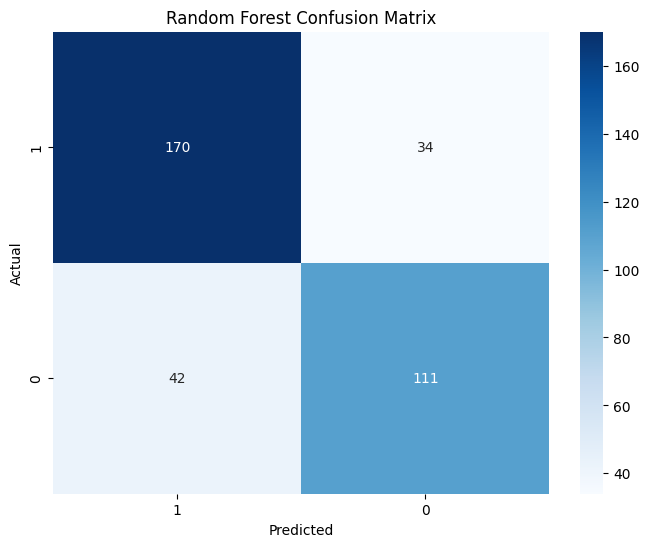

In [131]:
# Plot the confusion matrix as a heatmap
confusion = confusion_matrix(y_test, y_pred_tuned_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=df["Overall Survival Status"].unique(),
            yticklabels=df["Overall Survival Status"].unique())
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **4. Support Vector Machining (SVC)**

In [132]:
model_sv = SVC(random_state=42)

In [133]:
model_sv.fit(X_train,y_train)

SVC(random_state=42)

In [134]:
y_pred_sv = model_sv.predict(X_test)

In [135]:
accuracy_score(y_test,y_pred_sv)

0.7619047619047619

In [136]:
precision_score(y_test,y_pred_sv)

0.75

In [137]:
recall_score(y_test,y_pred_sv)

0.6666666666666666

In [138]:
f1_score(y_test,y_pred_sv)

0.7058823529411765

In [139]:
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       204
         1.0       0.75      0.67      0.71       153

    accuracy                           0.76       357
   macro avg       0.76      0.75      0.75       357
weighted avg       0.76      0.76      0.76       357



In [140]:
# Define the hyperparameter grid
grid_params_svc = {
    'C': [0.1, 1, 10],  # Reduced range of regularization parameter
    'kernel': ['linear', 'rbf'],  # Keep only the most efficient kernels
    'gamma': ['scale', 0.01, 0.1],  # Reduce gamma choices
}

In [141]:
# Perform Grid Search
grid_search_svc = GridSearchCV(model_sv, grid_params_svc, cv=5, n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1],
                         'kernel': ['linear', 'rbf']})

In [142]:
# Find the best parameters
best_parameter_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

print("Best Parameters:", best_parameter)
print("Best Score:", best_score)

Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8287719298245614


In [143]:
# Fit the model with the best parameters
tuned_model_svc = SVC(**best_parameter_svc)
tuned_model_svc.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [144]:
# Classification Report of the Support Vector Machine Model
y_pred_tuned_svc = tuned_model_svc.predict(X_test)
print(classification_report(y_test, y_pred_tuned_svc))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       204
         1.0       0.76      0.79      0.78       153

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.81      0.80      0.80       357



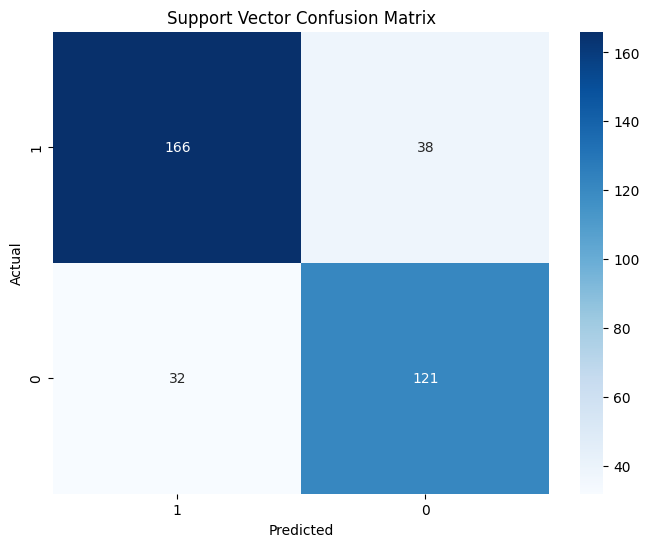

In [145]:
# Plot the confusion matrix as a heatmap
confusion = confusion_matrix(y_test,y_pred_tuned_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=df["Overall Survival Status"].unique(),
            yticklabels=df["Overall Survival Status"].unique())
plt.title('Support Vector Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Comparision of Models**

#### **1. Accuracy score of models**

In [146]:
results_acc = {
    'Logistic Regression': 0.82,   
    'Decision Tree': 0.76,         
    'Random Forest': 0.82,         
    'Support Vector Machine': 0.83 
}

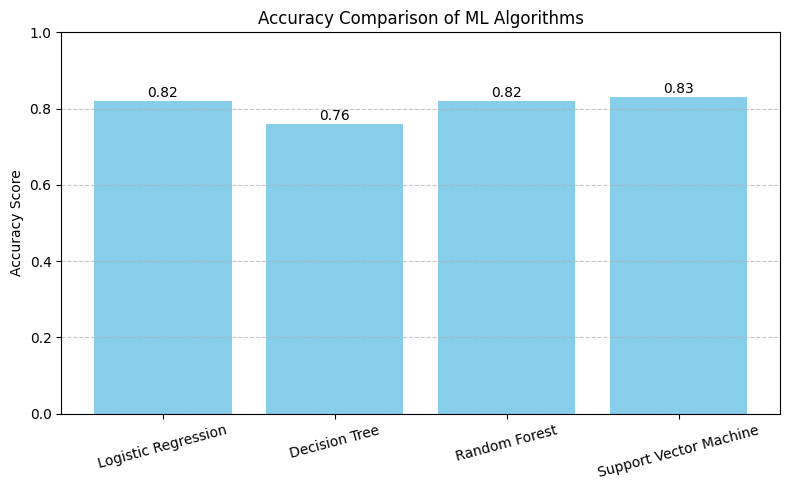

In [147]:
# Extract model names and scores
models_acc = list(results_acc.keys())
scores_acc = list(results_acc.values())

plt.figure(figsize=(8, 5))
bars_acc = plt.bar(models_acc, scores_acc, color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison of ML Algorithms')

# Add value labels on top of bars
for bar in bars_acc:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center')

plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **2. Precision Score of Models**

In [148]:
results_pre = {
    'Logistic Regression': 0.86,   
    'Decision Tree': 0.82,         
    'Random Forest': 0.85,         
    'Support Vector Machine': 0.87 
}

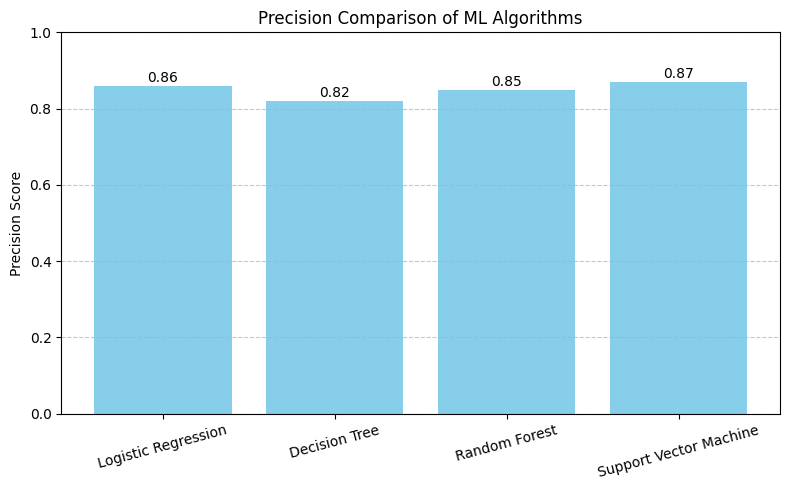

In [149]:
# Extract model names and scores
models_pre = list(results_pre.keys())
scores_pre = list(results_pre.values())

plt.figure(figsize=(8, 5))
bars_pre = plt.bar(models_pre, scores_pre, color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Precision Score')
plt.title('Precision Comparison of ML Algorithms')

# Add value labels on top of bars
for bar in bars_pre:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center')

plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **3. Recall Score of Models**

In [150]:
results_re = {
    'Logistic Regression': 0.81,   
    'Decision Tree': 0.73,         
    'Random Forest': 0.83,         
    'Support Vector Machine': 0.81 
}

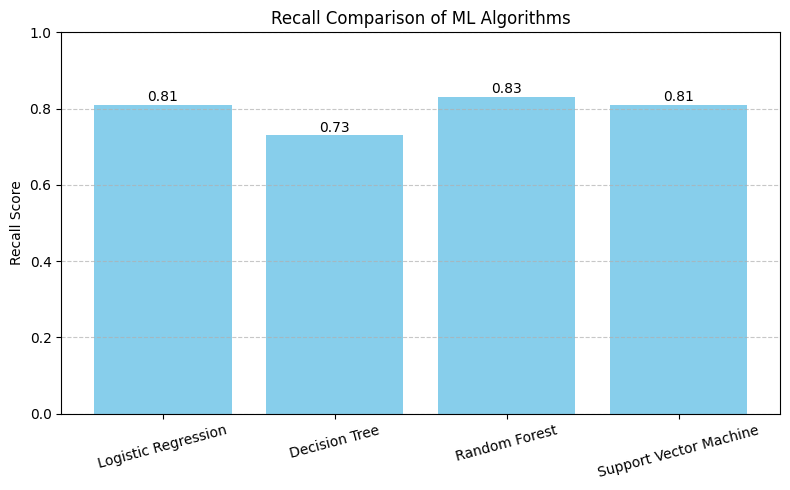

In [151]:
# Extract model names and scores
models_re = list(results_re.keys())
scores_re = list(results_re.values())

plt.figure(figsize=(8, 5))
bars_re = plt.bar(models_re, scores_re, color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Recall Score')
plt.title('Recall Comparison of ML Algorithms')

# Add value labels on top of bars
for bar in bars_re:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center')

plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **4. F1 Score of Models**

In [152]:
results_f1 = {
    'Logistic Regression': 0.84,   
    'Decision Tree': 0.77,         
    'Random Forest': 0.84,         
    'Support Vector Machine': 0.84 
}

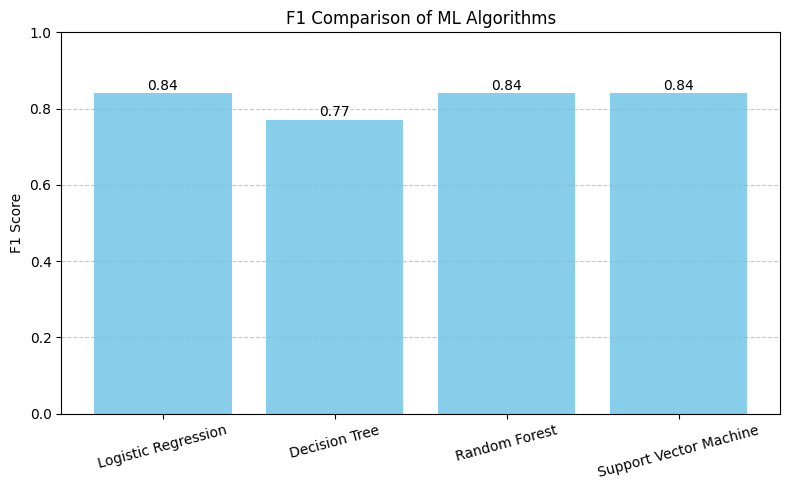

In [153]:
# Extract model names and scores
models_f1 = list(results_f1.keys())
scores_f1 = list(results_f1.values())

plt.figure(figsize=(8, 5))
bars_f1 = plt.bar(models_f1, scores_f1, color='skyblue')
plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.title('F1 Comparison of ML Algorithms')

# Add value labels on top of bars
for bar in bars_f1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center')

plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [154]:
print("lr")
print(classification_report(y_test,y_pred_tuned_lr))
print('dt')
print(classification_report(y_test,y_pred_tuned_dt))
print("rf")
print(classification_report(y_test, y_pred_tuned_rf))
print('svc')
print(classification_report(y_test, y_pred_tuned_svc))

lr
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82       204
         1.0       0.75      0.80      0.78       153

    accuracy                           0.80       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.81      0.80      0.80       357

dt
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80       204
         1.0       0.75      0.68      0.71       153

    accuracy                           0.77       357
   macro avg       0.76      0.76      0.76       357
weighted avg       0.77      0.77      0.77       357

rf
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       204
         1.0       0.77      0.73      0.74       153

    accuracy                           0.79       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

svc
      

## **Best Model & Conclusion**

In healthcare (like breast cancer detection), Recall is often most critical:

Recall = TP / (TP + FN)
It tells us how many actual positive cases (cancer) we correctly identified.

- Missing a cancer diagnosis (False Negative) can be dangerous.

- So, a model with a high Recall is very important.

Based on visualizations and the importance of Recall:

For breast cancer risk prediction, minimizing false negatives is often more important (i.e., not missing actual cancer cases), so Recall is crucial.
Therefore, Random Forest stands out as the most reliable model overall:
- It has the highest recall (0.83),
- Strong precision (0.85),
- High F1 score (0.84),
- And solid accuracy (0.82).